In [43]:
import os
import numpy as np
import pandas as pd
from glob import glob
from matplotlib import pyplot as plt
from skimage import io
import cv2
%matplotlib inline

In [44]:
train_bounding_boxeds = glob(os.path.join('all/', 'train_bounding_boxes.csv'))[0]
df = pd.read_csv(train_bounding_boxeds)

In [49]:
tmp = df.loc[df.ImageID.str.startswith('0')].loc[1000:1063]

(33, 19, 3)
(27, 16, 3)
(22, 14, 3)
(34, 14, 3)
(31, 15, 3)
(22, 9, 3)
(21, 13, 3)
(14, 11, 3)
(18, 9, 3)
(23, 13, 3)
(21, 12, 3)
(15, 12, 3)
(19, 13, 3)
(26, 14, 3)
(23, 10, 3)
(17, 10, 3)
(23, 13, 3)
(24, 14, 3)
(16, 14, 3)
(15, 14, 3)
(26, 13, 3)
(23, 12, 3)
(27, 13, 3)
(26, 14, 3)
(17, 5, 3)
(18, 12, 3)
(19, 8, 3)
(21, 14, 3)
(34, 15, 3)
(16, 16, 3)
(19, 15, 3)
(27, 17, 3)
(22, 15, 3)
(45, 26, 3)
(563, 259, 3)
(459, 676, 3)
(720, 137, 3)
(660, 243, 3)
(796, 294, 3)
(208, 273, 3)
(267, 298, 3)
(359, 149, 3)
(524, 213, 3)
(432, 127, 3)
(660, 144, 3)
(741, 131, 3)
(758, 216, 3)
(1023, 603, 3)
(438, 40, 3)
(47, 19, 3)
(40, 25, 3)
(75, 59, 3)
(55, 28, 3)
(43, 31, 3)
(333, 25, 3)
(15, 10, 3)
(841, 133, 3)
(731, 127, 3)
(754, 210, 3)
(112, 110, 3)
(106, 58, 3)
(16, 12, 3)
(24, 10, 3)
(21, 13, 3)


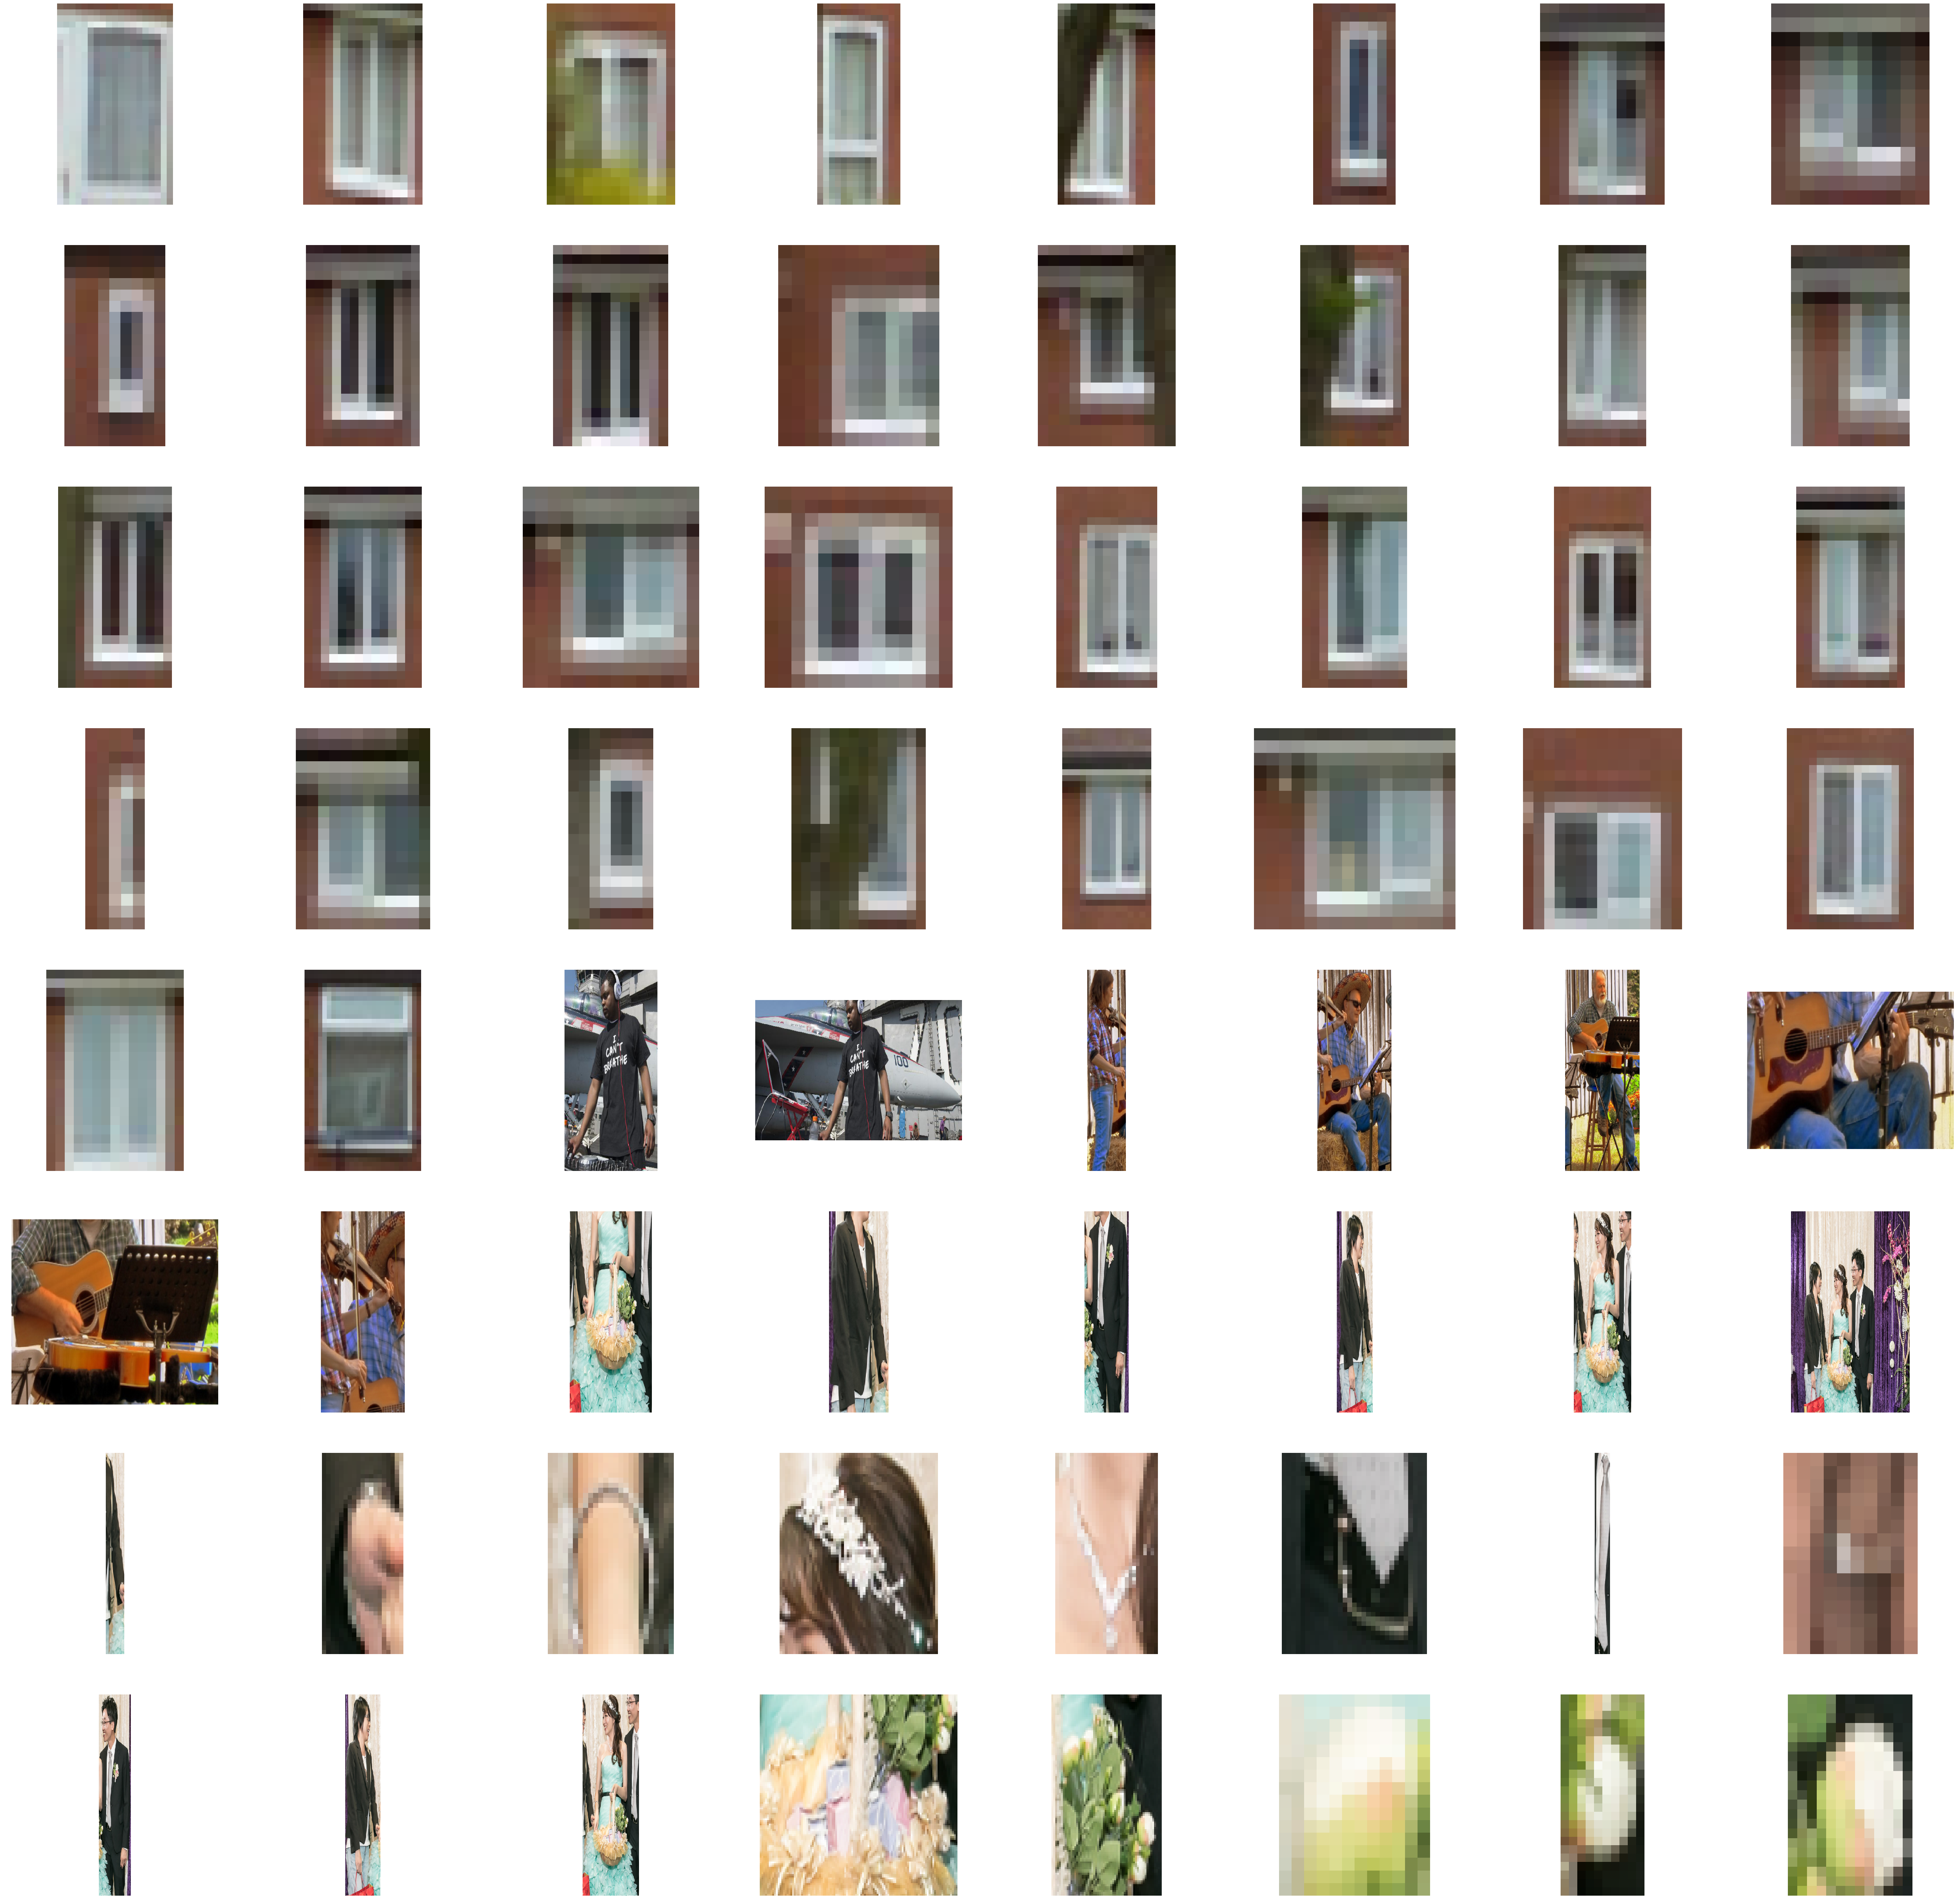

In [50]:
fig = plt.figure(figsize=(100, 100))
cnt = 0
for index, row in tmp.iterrows():
    cnt += 1
    img_name = 'train_0/'+row.ImageID+'.jpg'
    image = io.imread(img_name)
    if len(image.shape) == 1:
        image = image[0]
    if len(image.shape) == 2 or (len(image.shape) == 3 and image.shape[2] == 1):
        image = cv2.cvtColor(image,cv2.COLOR_GRAY2RGB)
    if  (len(image.shape) == 3 and image.shape[2] == 4):
        image = cv2.cvtColor(image,cv2.COLOR_RGBA2RGB)

    h0, w0 = image.shape[:2]
    scale = 1024/max(h0, w0)
    h, w = int(round(h0*scale)), int(round(w0*scale))
    image = cv2.resize(image, (h, w), interpolation = cv2.INTER_AREA)
    image = image[
        max(0, int(row.YMin*w)-2):min(w-1, int(row.YMax*w)+2),
        max(0, int(row.XMin*h)-2):min(h-1, int(row.XMax*h)+2)
    ]
    print(image.shape)
    fig.add_subplot(8,8,cnt)
    plt.axis('off')
    plt.imshow(image)
plt.show()

In [42]:
tmp

ImageID  Source  LabelName  Confidence      XMin      XMax  \
0   000002b66c9c498e  xclick  /m/01g317           1  0.012500  0.195312   
1   000002b66c9c498e  xclick  /m/01g317           1  0.025000  0.276563   
2   000002b66c9c498e  xclick  /m/01g317           1  0.151562  0.310937   
3   000002b66c9c498e  xclick  /m/01g317           1  0.256250  0.429688   
4   000002b66c9c498e  xclick  /m/01g317           1  0.257812  0.346875   
5   000002b66c9c498e  xclick  /m/01g317           1  0.320312  0.368750   
6   000002b66c9c498e  xclick  /m/01g317           1  0.412500  0.945312   
7   000002b66c9c498e  xclick   /m/0284d           1  0.528125  0.923437   
8   000002b66c9c498e  xclick  /m/04bcr3           1  0.064062  0.492188   
9   000002b66c9c498e  xclick  /m/04bcr3           1  0.301562  0.990625   
10  000002b66c9c498e  xclick  /m/04bcr3           1  0.312500  0.578125   
11  000002b66c9c498e  xclick   /m/0fszt           1  0.523438  0.928125   
12  000002b66c9c498e  xclick   /m/0hnyx           1  0.525000  0.920313   
13  000002b97e5471a0  xclick   /m/0cgh4           1  0.000000  0.054409   
14  000002b97e5471a0  xclick   /m/0cgh4           1  0.000000  0.105066   
15  000002b97e5471a0  xclick   /m/0cgh4           1  0.068168  0.151345   
16  000002b97e5471a0  xclick   /m/0cgh4           1  0.147592  0.261413   
17  000002b97e5471a0  xclick   /m/0cgh4           1  0.626016  0.999375   
18  000002b97e5471a0  xclick   /m/0cgh4           1  0.806754  0.913071   
19  000002b97e5471a0  xclick   /m/0cgh4           1  0.861163  0.999375   
20  000002b97e5471a0  xclick   /m/0d4v4           1  0.961851  0.973734   

        YMin      YMax  IsOccluded  IsTruncated  IsGroupOf  IsDepiction  \
0   0.148438  0.587500           0            1          0            0   
1   0.714063  0.948438           0            1          0            0   
2   0.198437  0.590625           1            0          0            0   
3   0.651563  0.925000           1            0          0            0   
4   0.235938  0.385938           1            0          0            0   
5   0.260938  0.328125           1            0          0            0   
6   0.120312  0.475000           1            0          1            0   
7   0.675000  0.964063           0            0          0            0   
8   0.889063  0.993750           0            0          0            0   
9   0.462500  0.595312           0            0          0            0   
10  0.351562  0.464063           0            0          0            0   
11  0.668750  0.981250           0            1          0            1   
12  0.664062  0.976562           0            0          0            0   
13  0.903333  0.999167           1            1          0            0   
14  0.190000  0.725833           0            1          0            0   
15  0.900000  0.956667           1            0          0            0   
16  0.853333  0.970000           1            0          0            0   
17  0.765000  0.999167           1            0          0            0   
18  0.677500  0.768333           1            0          0            0   
19  0.414167  0.887500           1            1          0            0   
20  0.490833  0.513333           0            0          0            0   

    IsInside  
0          0  
1          0  
2          0  
3          0  
4          0  
5          0  
6          0  
7          0  
8          0  
9          0  
10         0  
11         0  
12         0  
13         0  
14         0  
15         0  
16         0  
17         0  
18         0  
19         0  
20         0

In [46]:
df.loc[df.ImageID.str.startswith('0')].LabelName.unique()

array(['/m/01g317', '/m/0284d', '/m/04bcr3', '/m/0fszt', '/m/0hnyx',
       '/m/0cgh4', '/m/0d4v4', '/m/03bt1vf', '/m/0k4j', '/m/0pg52',
       '/m/014sv8', '/m/01n4qj', '/m/0283dt1', '/m/039xj_', '/m/03q69',
       '/m/04hgtk', '/m/04yx4', '/m/0dzct', '/m/0dzf4', '/m/0jyfg',
       '/m/0k65p', '/m/01rkbr', '/m/01xyhv', '/m/07j7r', '/m/01yx86',
       '/m/019jd', '/m/033rq4', '/m/06nrc', '/m/0zvk5', '/m/026t6',
       '/m/0342h', '/m/09j2d', '/m/03rszm', '/m/01940j', '/m/07yv9',
       '/m/01lrl', '/m/04rky', '/m/09j5n', '/m/01bl7v', '/m/0k0pj',
       '/m/0h8mhzd', '/m/01cmb2', '/m/0199g', '/m/01bqk0', '/m/01xygc',
       '/m/02h19r', '/m/02p0tk3', '/m/032b3c', '/m/035r7c', '/m/0fly7',
       '/m/02wbm', '/m/025dyy', '/m/017ftj', '/m/079cl', '/m/0c9ph5',
       '/m/0138tl', '/m/01jfsr', '/m/0bt_c3', '/m/080hkjn', '/m/05s2s',
       '/m/03jm5', '/m/02fq_6', '/m/07mhn', '/m/0h8l4fh', '/m/06msq',
       '/m/0dbzx', '/m/015qff', '/m/01bjv', '/m/02dgv', '/m/083wq',
       '/m/0h9mv', '/m/0

In [11]:
print(list(df))

['ImageID', 'Subset', 'OriginalURL', 'OriginalLandingURL', 'License', 'AuthorProfileURL', 'Author', 'Title', 'OriginalSize', 'OriginalMD5', 'Thumbnail300KURL', 'Rotation']


In [17]:
df.AuthorProfileURL.str.startswith('https://www.flickr.com/people/').all()

True

In [20]:
df.AuthorProfileURL.unique()

array(['https://www.flickr.com/people/michael-beat/',
       'https://www.flickr.com/people/drstarbuck/',
       'https://www.flickr.com/people/circasassy/', ...,
       'https://www.flickr.com/people/alvarom/',
       'https://www.flickr.com/people/ryanleeuk/',
       'https://www.flickr.com/people/virmaxcafe/'], dtype=object)